# Sujet : Personnalisation des recommandations des produits dans le cadre d’un site E-commerce

**Réaliser par :**
   *Achraf Akrache* et 
   *Asmae Moubarriz*
- Variable décisionnelle : catégories de produits 
 
- Lien de téléchargement du jeu de données https://www.kaggle.com/datasets/kartikeybartwal/ecommerce-product-recommendation-collaborative 

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
#approche1
from sklearn.linear_model import LogisticRegression
#approche2
from sklearn.neighbors import KNeighborsClassifier
#approche3
from sklearn.tree import DecisionTreeClassifier
#approche4
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

#  I - **Phase d'Exploration**

## 1. chargement des données depuis le fichier CSV

In [140]:
data = pd.read_csv('user_personalized_features.csv')

- notre dataset est composée de 15 columns dont 9 colomns avec des valeurs numérique .
- notre dataset est de taille 1000 record

In [141]:
data.describe()

Unnamed: 0          Age         Income  Last_Login_Days_Ago  \
count  1000.000000  1000.000000    1000.000000          1000.000000   
mean    499.500000    40.986000   81304.732000            15.586000   
std     288.819436    13.497852   37363.972753             8.205604   
min       0.000000    18.000000   20155.000000             1.000000   
25%     249.750000    29.000000   48715.500000             8.000000   
50%     499.500000    42.000000   81042.000000            16.000000   
75%     749.250000    52.000000  112694.500000            23.000000   
max     999.000000    64.000000  149951.000000            29.000000   

       Purchase_Frequency  Average_Order_Value  Total_Spending  \
count         1000.000000          1000.000000     1000.000000   
mean             4.631000           104.039000     2552.957000   
std              2.837762            54.873569     1420.985048   
min              0.000000            10.000000      112.000000   
25%              2.000000            58.000000     1271.750000   
50%              5.000000           105.000000     2542.000000   
75%              7.000000           150.000000     3835.500000   
max              9.000000           199.000000     4999.000000   

       Time_Spent_on_Site_Minutes  Pages_Viewed  
count                 1000.000000    1000.00000  
mean                   297.360000      24.40300  
std                    175.596123      14.02017  
min                      2.000000       1.00000  
25%                    144.000000      12.00000  
50%                    292.500000      24.50000  
75%                    449.250000      36.00000  
max                    599.000000      49.00000

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   User_ID                      1000 non-null   object
 2   Age                          1000 non-null   int64 
 3   Gender                       1000 non-null   object
 4   Location                     1000 non-null   object
 5   Income                       1000 non-null   int64 
 6   Interests                    1000 non-null   object
 7   Last_Login_Days_Ago          1000 non-null   int64 
 8   Purchase_Frequency           1000 non-null   int64 
 9   Average_Order_Value          1000 non-null   int64 
 10  Total_Spending               1000 non-null   int64 
 11  Product_Category_Preference  1000 non-null   object
 12  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 13  Pages_Viewed                 1000 

## 2. Visualisation des relations entre la variable décisionelle et les autres colonnes

### 2.1. Définition des Variables importants
 (***cette étape génére des variables qui vont être utilisé dans des autres noeuds par la suite***)

In [143]:
categorical_columns = ['Gender', 'Location', 'Interests']
numerical_columns = ['Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value', 
                     'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']

target = 'Product_Category_Preference'

### 2.2. Plot pour les colonnes de type Objet 

C:\Users\mbras\AppData\Local\Temp\ipykernel_14624\3970848346.py:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=target, hue=col , palette=palette)


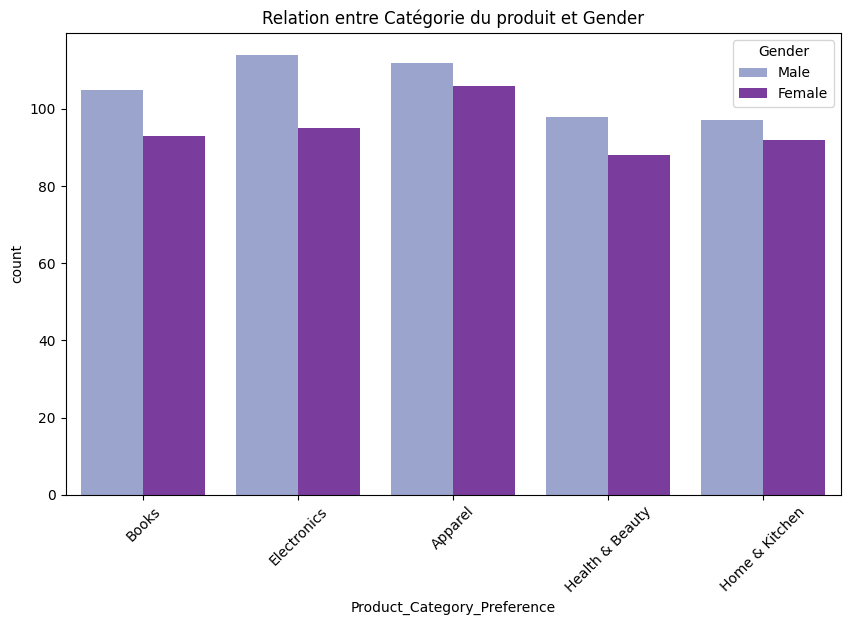

C:\Users\mbras\AppData\Local\Temp\ipykernel_14624\3970848346.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=data, x=target, hue=col , palette=palette)


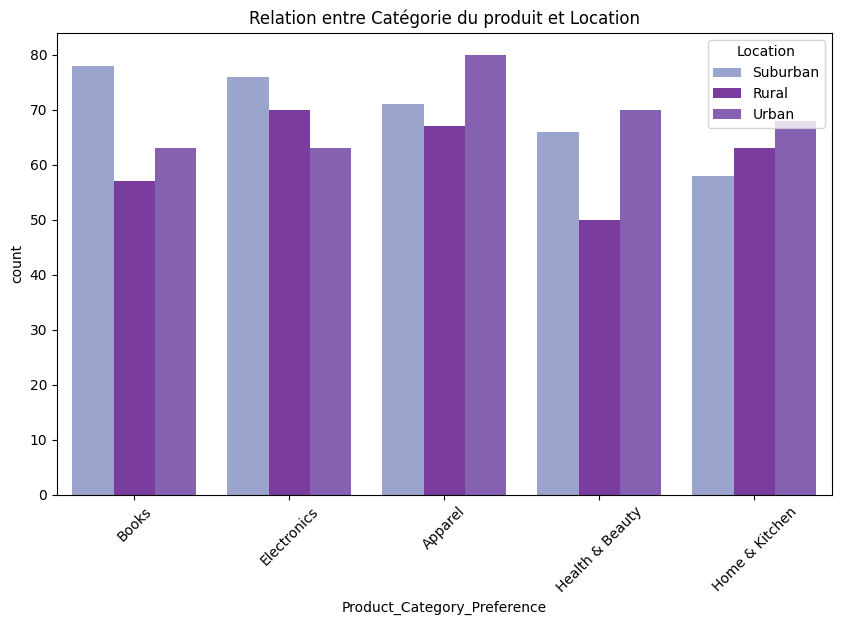

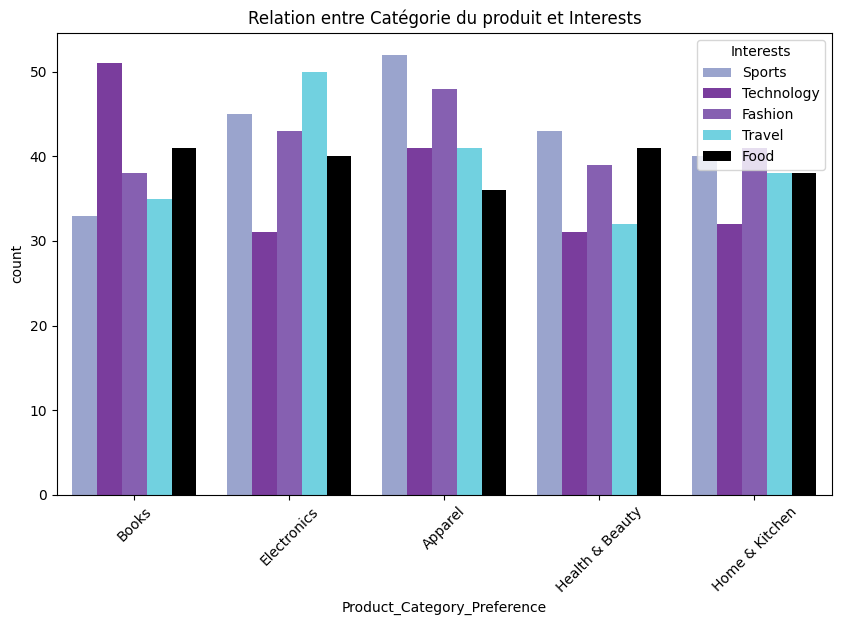

In [144]:
palette=['#929FD5','#7E2DAD','#8552BF','#5FDEF2','#000000']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=target, hue=col , palette=palette)
    plt.title(f'Relation entre Catégorie du produit et {col}')
    plt.xticks(rotation=45)
    plt.show()

### 2.3. Calcule de la corrélation des variables numériques avec la variable décisionelle 

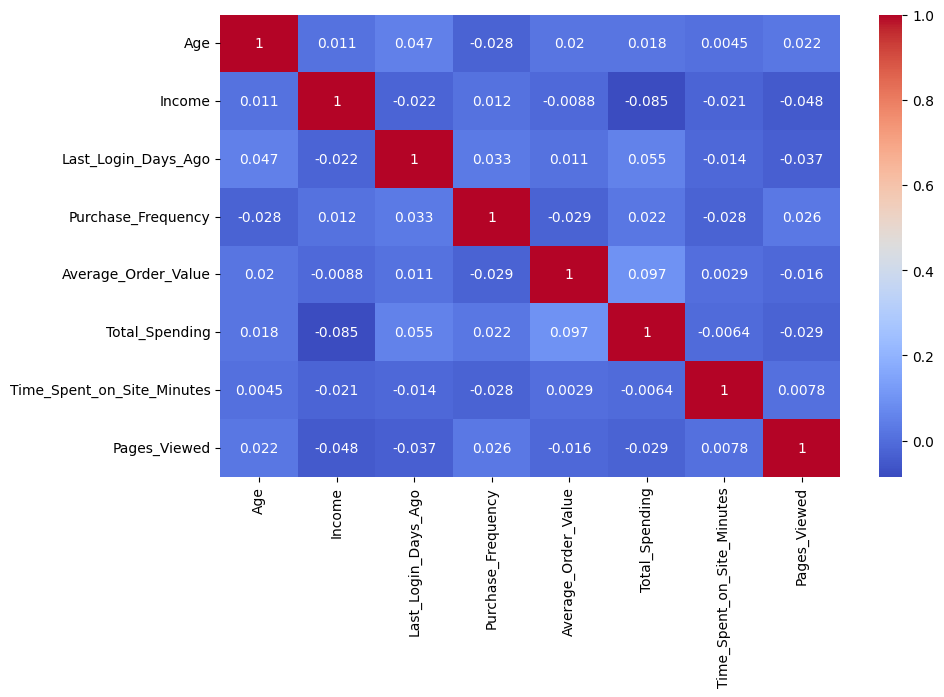

In [145]:
correlation_matrice = data[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrice, annot=True, cmap='coolwarm')
plt.show()

<span style="color: red;"> Remarque : </span>
on remarque que les variables sont  **faiblement** corréler entre eux donc on n'a pas besoin de supprimer aucune colonne

# II - **Phase de pré-traitement des données**

## 1. Vérification des variables aberrantes  

***on remarque la valeur du skewness est presque null dans tous les colonnees ce qui montre l'abscence des valeurs abérantes***

In [146]:
for column in numerical_columns:
    skewness_per_column = data[column].skew()
    print(f"Skewness for {column} is {skewness_per_column}")

Skewness for Age is -0.046883220802412674
Skewness for Income is 0.0985078994287348
Skewness for Last_Login_Days_Ago is -0.0667529892316686
Skewness for Purchase_Frequency is -0.03551313447193858
Skewness for Average_Order_Value is 0.0314231961140403
Skewness for Total_Spending is 0.003128740092689204
Skewness for Time_Spent_on_Site_Minutes is 0.02435168716510395
Skewness for Pages_Viewed is 0.037588211407260146


## 2. Vérification de l'existance des nulls et duplications 

In [147]:
print("Vérification des nulls")
print(data.isnull().sum())
data.dropna(inplace=True)

Vérification des nulls
Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64


In [148]:
print("Vérification des duplications" , data.duplicated().sum())
data.drop_duplicates(inplace=True)

Vérification des duplications 0


## 3. Suppression des colonnes inutiles 

In [149]:
data.drop(['Unnamed: 0' ,'User_ID','Last_Login_Days_Ago','Time_Spent_on_Site_Minutes','Pages_Viewed','Newsletter_Subscription','Average_Order_Value','Purchase_Frequency'], axis=1, inplace=True)

## 4. Sauvegarde dans un nouveaux fichier

In [150]:
data.to_csv('user_personalized_features_cleaned.csv', index=False)
data.empty
data = pd.read_csv('user_personalized_features_cleaned.csv')

## 5. Visualisation des données aprés pré-traitement

In [151]:
data.head()

Age  Gender  Location  Income   Interests  Total_Spending  \
0   56    Male  Suburban   38037      Sports            2546   
1   46  Female     Rural  103986  Technology             320   
2   32  Female  Suburban  101942      Sports            3766   
3   60  Female  Suburban   71612     Fashion            4377   
4   25    Male  Suburban   49725      Travel            4502   

  Product_Category_Preference  
0                       Books  
1                 Electronics  
2                     Apparel  
3                     Apparel  
4             Health & Beauty

# III- **Phase d'Entrainement**

## **<span style="color: Cyan;">Premier Essai </span>**
- Type d'encodage :  **( Label Encodage )**
- Model essayé : Logistic Regression , Kneighbors  , DecisionTree et RandomForestClassifier

**<span style="color: Red;">Résultat :</span>** accuracy ne dépace pas **25%**

### **<span style="color: Green;">1. Encodage des variables avec *Label Encoding*</span>**

In [152]:
data_label_encoded = data.copy()
data_label_encoded.head()

Age  Gender  Location  Income   Interests  Total_Spending  \
0   56    Male  Suburban   38037      Sports            2546   
1   46  Female     Rural  103986  Technology             320   
2   32  Female  Suburban  101942      Sports            3766   
3   60  Female  Suburban   71612     Fashion            4377   
4   25    Male  Suburban   49725      Travel            4502   

  Product_Category_Preference  
0                       Books  
1                 Electronics  
2                     Apparel  
3                     Apparel  
4             Health & Beauty

In [153]:
Genderencodage = LabelEncoder()
data_label_encoded['Gender']=Genderencodage.fit_transform(data_label_encoded['Gender'])
Locationencodage = LabelEncoder()
data_label_encoded['Location']=Locationencodage.fit_transform(data_label_encoded['Location'])
Interestsencodage = LabelEncoder()
data_label_encoded['Interests']=Interestsencodage.fit_transform(data_label_encoded['Interests'])
data_label_encoded.head()

Age  Gender  Location  Income  Interests  Total_Spending  \
0   56       1         1   38037          2            2546   
1   46       0         0  103986          3             320   
2   32       0         1  101942          2            3766   
3   60       0         1   71612          0            4377   
4   25       1         1   49725          4            4502   

  Product_Category_Preference  
0                       Books  
1                 Electronics  
2                     Apparel  
3                     Apparel  
4             Health & Beauty

### **<span style="color: Green;">2. Feature Engineering </span>**

- on definie le X , qui est le dataset sans la variable decisionnelle (Product_category_preference)

- on definie le y qui est la colonne de la variable décisionnelle (Product_category_preference)

In [154]:
X= data_label_encoded.drop(columns=['Product_Category_Preference'])
y = data_label_encoded['Product_Category_Preference'] 

In [155]:
scaler = StandardScaler()
X[['Age', 'Income', 'Total_Spending']] = scaler.fit_transform(
    X[['Age', 'Income', 'Total_Spending']]
)

### **<span style="color: Green;">3. Split des valeurs test et entrainement </span>**

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **<span style="color: Green;">4. Traitement du déséquilibre des données  </span>**

In [157]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### **<span style="color: Green;">5. Premiére Approche (KNeighbors)</span>**

- On utilise KNeighbors comme modèle de classification.
- Il capture les relations non linéaires entre les classes.
- Il calcule la distance entre  l'échantillon  et tous les autres échantillons d’entraînement
- Facile à comprendre et à interpréter.
- Fonctionne bien sur les ensembles de données petits à moyens.

**Exemple**

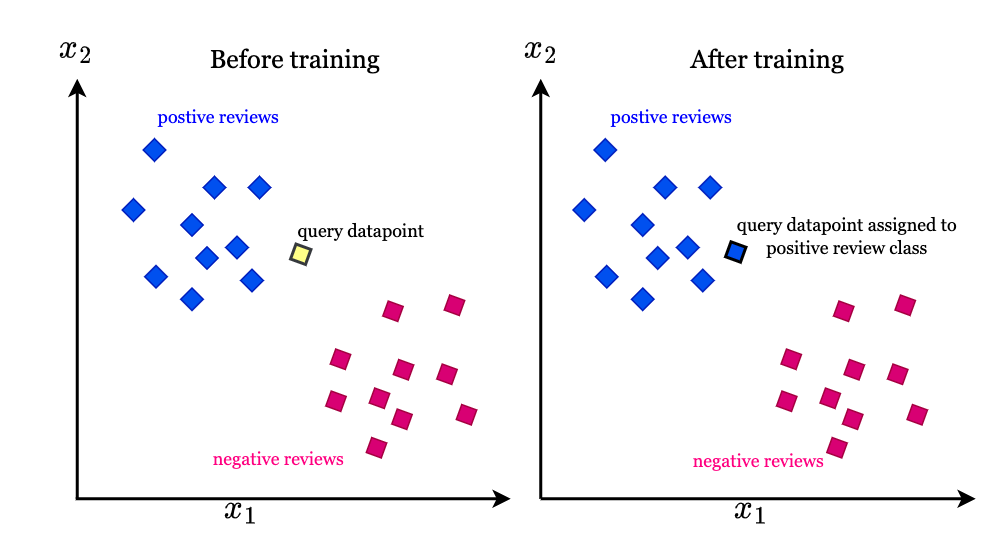

#### **<span style="color: Orange;">KNeighbors Classifier Model</span>**

In [161]:
KnnModel = KNeighborsClassifier(n_neighbors=5)
KnnModel.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

#### **<span style="color: Orange;">Phase de test du Kneighbors Model</span>**

**Classification Report**

In [162]:
y_pred = KnnModel.predict(X_test)
print("KnnModel")
print(classification_report(y_test, y_pred))

KnnModel
                 precision    recall  f1-score   support

        Apparel       0.18      0.28      0.22        39
          Books       0.13      0.12      0.12        34
    Electronics       0.22      0.18      0.20        44
Health & Beauty       0.16      0.18      0.17        38
 Home & Kitchen       0.25      0.16      0.19        45

       accuracy                           0.18       200
      macro avg       0.19      0.18      0.18       200
   weighted avg       0.19      0.18      0.18       200



**Cross Validation**

In [163]:
cv_scores = cross_val_score(KnnModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.39664804469273746
Mean cross-validation score: 0.26033519553072626


### **<span style="color: Green;">6. Deuxiéme Approche (Arbre de décision) </span>**

- On utilise Decision Tree comme modèle de classification.
- Il capture les relations non linéaires entre les classes .
- Facile à visualiser et à interpréter.
- Fonctionne bien sur les ensembles de données petits à moyens.

**Exemple**

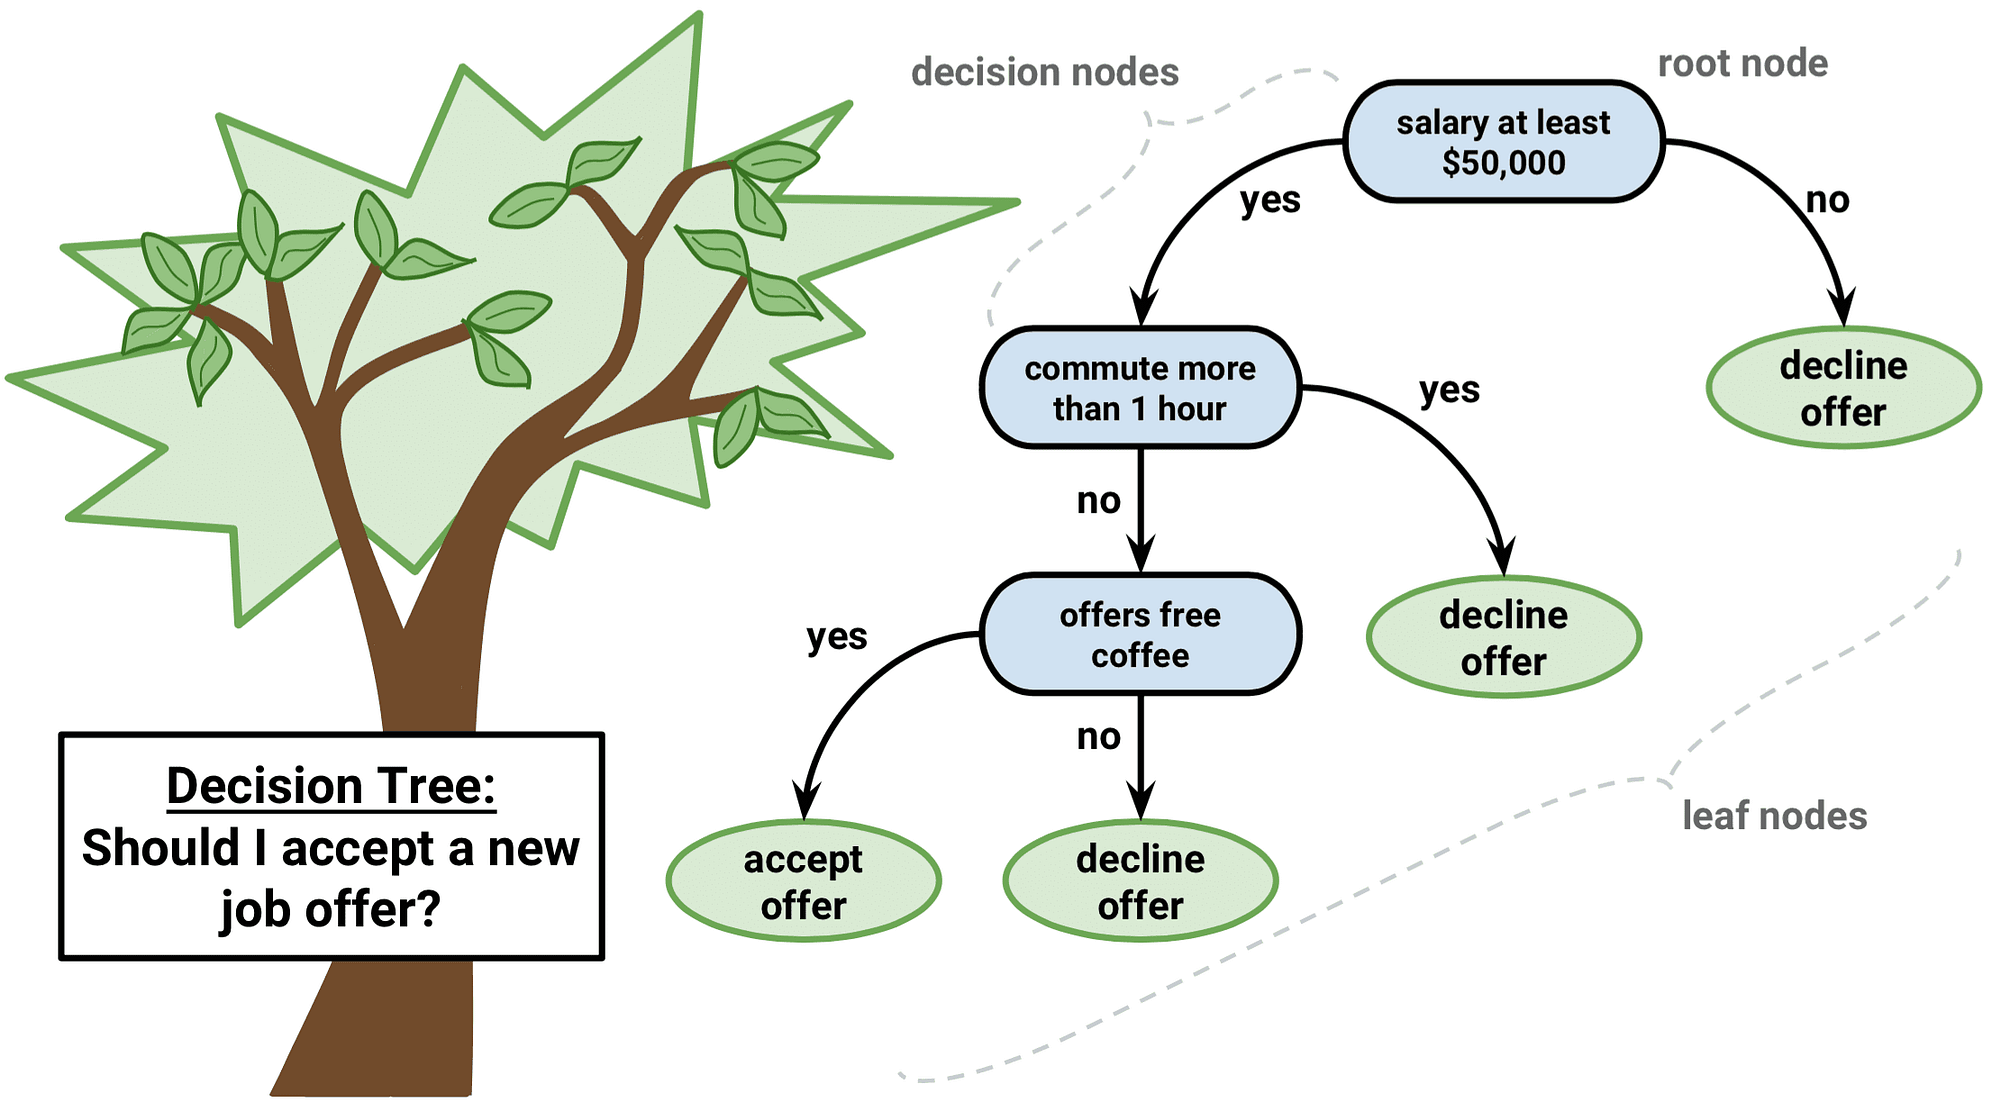


#### **<span style="color: Orange;">Decision Tree Classifier Model</span>**


In [164]:
DecisionTreeClassifierModel =DecisionTreeClassifier(
    max_depth=30, min_samples_split=5, random_state=42
)
DecisionTreeClassifierModel.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=30, min_samples_split=5, random_state=42)

#### **<span style="color: Orange;">Phase Test du Modele Decision Tree</span>**

**Classification Report**

In [165]:
y_pred = DecisionTreeClassifierModel.predict(X_test)
print("DecisionTreeClassifierModel")
print(classification_report(y_test, y_pred))

DecisionTreeClassifierModel
                 precision    recall  f1-score   support

        Apparel       0.17      0.23      0.20        39
          Books       0.21      0.26      0.24        34
    Electronics       0.14      0.11      0.13        44
Health & Beauty       0.24      0.24      0.24        38
 Home & Kitchen       0.18      0.13      0.15        45

       accuracy                           0.19       200
      macro avg       0.19      0.20      0.19       200
   weighted avg       0.19      0.19      0.19       200



**Cross Validation**

In [166]:
cv_scores = cross_val_score(DecisionTreeClassifierModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.3016759776536313
Mean cross-validation score: 0.2525139664804469


#### **<span style="color: Orange;">Synthése du Model Décision Tree</span>**
on remarque que le score de Accuracy a augmenté . A fin d'augmenter d'avantage ce score on fait recours à un model plus complexe qui ce dérive du model Decision Tree

### **<span style="color: Green;">7. Troisiéme Approche (Random Forest Classifier) </span>**

- Le **Random Forest Classifier** offre une grande précision en combinant plusieurs arbres de décision, réduisant ainsi le risque de surapprentissage.
- Chaque arbre est construit à partir d'un échantillon aléatoire des données d'entraînement .
- Il est capable de traiter des données mixtes (catégoriques et numériques) et reste robuste face aux données manquantes.
- Il permet d'identifier les caractéristiques les plus importantes pour les prédictions, rendant le modèle interprétable.


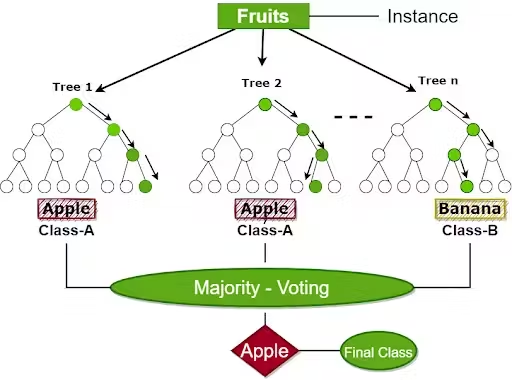


#### **<span style="color: Orange;">Random Forest Classifier Model</span>**

In [167]:
RandomForestClassifierModel = RandomForestClassifier(
    max_depth=3
)
RandomForestClassifierModel.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=3)

#### **<span style="color: Orange;">Phase Test du Modele Random Forest Classifier</span>**

**Classification Report**

In [168]:
y_pred = RandomForestClassifierModel.predict(X_test)
print("RandomForestClassifierModel")
print(classification_report(y_test, y_pred))

RandomForestClassifierModel
                 precision    recall  f1-score   support

        Apparel       0.12      0.05      0.07        39
          Books       0.15      0.12      0.13        34
    Electronics       0.33      0.48      0.39        44
Health & Beauty       0.24      0.29      0.27        38
 Home & Kitchen       0.23      0.24      0.24        45

       accuracy                           0.24       200
      macro avg       0.21      0.24      0.22       200
   weighted avg       0.22      0.24      0.23       200



**Cross Validation**

In [169]:
cv_scores = cross_val_score(RandomForestClassifierModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.2905027932960894
Mean cross-validation score: 0.2011173184357542


#### **<span style="color: Orange;">Synthése du Model Random Forest Classifier</span>**
on remarque que le score de Accuracy a effectivement augmenté , Mais ça reste dans les environs des vingtaines ce qui nous à pousser à poser l'hypothése de changer l'encodage des variables 

## **<span style="color: Cyan;">2éme Essai </span>**
- Type d'encodage :  **( One-Hot Encoding and Label Encoding )**
- Model essayé : Kneighbors  , DecisionTree , RandomForestClassifier

**<span style="color: Red;">Résultat :</span>** accuracy ne dépace pas **30%**

### **<span style="color: Green;">1. Encodage des variables avec *One-Hot Encoding*</span>**

In [170]:
data_onehot_encoded = data.copy()
data_onehot_encoded.head()

Age  Gender  Location  Income   Interests  Total_Spending  \
0   56    Male  Suburban   38037      Sports            2546   
1   46  Female     Rural  103986  Technology             320   
2   32  Female  Suburban  101942      Sports            3766   
3   60  Female  Suburban   71612     Fashion            4377   
4   25    Male  Suburban   49725      Travel            4502   

  Product_Category_Preference  
0                       Books  
1                 Electronics  
2                     Apparel  
3                     Apparel  
4             Health & Beauty

In [171]:
#Gender Label Encoding
Genderencodage = LabelEncoder()
data_onehot_encoded['Gender']=Genderencodage.fit_transform(data_onehot_encoded['Gender'])
#Interests and Location Label Encoding 
data_onehot_encoded = pd.get_dummies(data_onehot_encoded, columns=['Interests','Location'])
data_onehot_encoded.head()

Age  Gender  Income  Total_Spending Product_Category_Preference  \
0   56       1   38037            2546                       Books   
1   46       0  103986             320                 Electronics   
2   32       0  101942            3766                     Apparel   
3   60       0   71612            4377                     Apparel   
4   25       1   49725            4502             Health & Beauty   

   Interests_Fashion  Interests_Food  Interests_Sports  Interests_Technology  \
0              False           False              True                 False   
1              False           False             False                  True   
2              False           False              True                 False   
3               True           False             False                 False   
4              False           False             False                 False   

   Interests_Travel  Location_Rural  Location_Suburban  Location_Urban  
0             False           False               True           False  
1             False            True              False           False  
2             False           False               True           False  
3             False           False               True           False  
4              True           False               True           False

### **<span style="color: Green;">2. Feature Engineering </span>**

- on definie le X , qui est le dataset sans la variable decisionnelle (Product_category_preference)

- on definie le y qui est la colonne de la variable décisionnelle (Product_category_preference)

In [172]:
X.empty
y.empty
X= data_onehot_encoded.drop(columns=['Product_Category_Preference'])
y = data_onehot_encoded['Product_Category_Preference'] 

In [173]:
scaler = StandardScaler()
X[['Age', 'Income', 'Total_Spending']] = scaler.fit_transform(
    X[['Age', 'Income',  'Total_Spending']]
)

### **<span style="color: Green;">3. Split des valeurs test et entrainement </span>**

In [174]:
X_train.empty
X_test.empty
y_train.empty
y_test.empty
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **<span style="color: Green;">4. Traitement du déséquilibre des données</span>**

In [175]:
X_train_balanced.empty
y_train_balanced.empty
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### **<span style="color: Green;">5. Premiére Approche (KNeighbors)</span>**

#### **<span style="color: Orange;">KNeighbors Classifier Model</span>**

In [176]:
KnnModel = KNeighborsClassifier(
    metric='manhattan',
    n_neighbors=3,
    weights='distance'
    )
KnnModel.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

#### **<span style="color: Orange;">Phase de test du Kneighbors Model</span>**

**Classification Report**

In [177]:
y_pred = KnnModel.predict(X_test)
print("KnnModel")
print(classification_report(y_test, y_pred))

KnnModel
                 precision    recall  f1-score   support

        Apparel       0.17      0.22      0.19        37
          Books       0.12      0.14      0.13        36
    Electronics       0.17      0.11      0.14        53
Health & Beauty       0.11      0.15      0.12        26
 Home & Kitchen       0.24      0.19      0.21        48

       accuracy                           0.16       200
      macro avg       0.16      0.16      0.16       200
   weighted avg       0.17      0.16      0.16       200



**Cross Validation**

In [192]:
cv_scores = cross_val_score(KnnModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))
print("Min cross-validation score:", np.min(cv_scores))

Max cross-validation score: 0.56353591160221
Mean cross-validation score: 0.3248618784530387
Min cross-validation score: 0.2541436464088398


### **<span style="color: Green;">6. Deuxieme Approche (Arbre de décision) </span>**


#### **<span style="color: Orange;">Decision Tree Classifier Model</span>**


In [179]:
DecisionTreeClassifierModel =DecisionTreeClassifier(
        max_depth=30,
  min_samples_leaf= 2, 
  min_samples_split= 5,

)
DecisionTreeClassifierModel.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5)

#### **<span style="color: Orange;">Phase Test du Modele Decision Tree</span>**

**Classification Report**

In [180]:
y_pred = DecisionTreeClassifierModel.predict(X_test)
print("DecisionTreeClassifierModel")
print(classification_report(y_test, y_pred))

DecisionTreeClassifierModel
                 precision    recall  f1-score   support

        Apparel       0.31      0.54      0.39        37
          Books       0.19      0.22      0.21        36
    Electronics       0.26      0.17      0.20        53
Health & Beauty       0.14      0.19      0.16        26
 Home & Kitchen       0.29      0.12      0.17        48

       accuracy                           0.24       200
      macro avg       0.24      0.25      0.23       200
   weighted avg       0.25      0.24      0.23       200



**Cross Validation**

In [181]:
cv_scores = cross_val_score(DecisionTreeClassifierModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.30386740331491713
Mean cross-validation score: 0.25524861878453037


### **<span style="color: Green;">7. Troisiéme Approche (Random Forest Classifier) </span>**

#### **<span style="color: Orange;">Random Forest Classifier Model</span>**

In [182]:
RandomForestClassifierModel = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
)
RandomForestClassifierModel.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

#### **<span style="color: Orange;">Phase Test du Model Random Forest Classifier</span>**

**Classification Report**

In [183]:
y_pred = RandomForestClassifierModel.predict(X_test)
print("RandomForestClassifierModel")
print(classification_report(y_test, y_pred))

RandomForestClassifierModel
                 precision    recall  f1-score   support

        Apparel       0.16      0.24      0.20        37
          Books       0.16      0.19      0.18        36
    Electronics       0.11      0.06      0.07        53
Health & Beauty       0.15      0.23      0.18        26
 Home & Kitchen       0.24      0.17      0.20        48

       accuracy                           0.17       200
      macro avg       0.16      0.18      0.16       200
   weighted avg       0.17      0.17      0.16       200



**Cross Validation**

In [188]:
cv_scores = cross_val_score(RandomForestClassifierModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))
print("Min cross-validation score:", np.min(cv_scores))

Max cross-validation score: 0.5524861878453039
Mean cross-validation score: 0.31602209944751386
Min cross-validation score: 0.23756906077348067


#### **<span style="color: Orange;">Synthése de tous les approches du deuxiéme essai</span>**

On remarque que les modeles Random Forest Classifier , KNN sont les modéles les plus optimale pour notre cas de classification de **catégorie de produit** , vu qu'ils donnent le score le plus elevée avec la validation croisée